In [41]:
import random

In [42]:
def draw_card():
    # j q k = 10, a = 11
    deck_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    return random.choice(deck_values)

In [43]:
def get_hand(hand):
    current_sum = sum(hand)
    ace_count = hand.count(11)

    while current_sum > 21 and ace_count > 0:
        current_sum -= 10
        ace_count -= 1

    usable_ace = (ace_count > 0)

    return current_sum, usable_ace

In [44]:
STICK = 0
HIT = 1 # actions

def generate_game(policy):
    # input: policy. output: [state, action] list, reward

    player_hand = [draw_card(), draw_card()]
    dealer_hand = [draw_card(), draw_card()]

    history = []
    # [(state, action), (state, action)...]

    while True:
        player_sum, usable_ace = get_hand(player_hand)

        dealer_card = dealer_hand[0]

        s = (player_sum, dealer_card, usable_ace)

        if player_sum > 21: # just safe coding
            return history, -1

        a = policy(s)

        history.append((s, a))

        if a == STICK:
            break
        else:
            player_hand.append(draw_card())

    player_sum, _ = get_hand(player_hand)
    dealer_sum, _ = get_hand(dealer_hand)

    # at least 17
    while dealer_sum < 17:
        dealer_hand.append(draw_card())
        dealer_sum, _ = get_hand(dealer_hand)

    reward = 0

    if dealer_sum > 21:
        reward = 1
    else:
        if player_sum > dealer_sum:
            reward = 1
        elif player_sum < dealer_sum:
            reward = -1
        else:
            reward = 0

    return history, reward

In [45]:
"""
def stupid_policy(state):
    player_sum, _, _ = state
    if player_sum < 19:
        return HIT
    else:
        return STICK

episode, reward = generate_game(stupid_policy)
print("history:", episode)
print("reward:", reward)
"""

'\ndef stupid_policy(state):\n    player_sum, _, _ = state\n    if player_sum < 19:\n        return HIT\n    else:\n        return STICK\n\nepisode, reward = generate_game(stupid_policy)\nprint("history:", episode)\nprint("reward:", reward)\n'

In [46]:
from collections import defaultdict

n_games =5000000
gamma = 1.0

Q = defaultdict(float)
N = defaultdict(int)


def get_best_action(state):
    val_stick = Q[(state, STICK)]
    val_hit = Q[(state, HIT)]

    if val_hit > val_stick:
        return HIT
    else:
        return STICK

epsilon = 1.0


def epsilon_greedy_policy(s):
    if random.random() < epsilon:
        return random.choice([STICK, HIT])

    return get_best_action(s)


print("Training")

for i in range(1, n_games + 1):

    epsilon = max(0.01, 1.0 - (i / (n_games * 0.9)))

    history, reward = generate_game(epsilon_greedy_policy)

    for s, a in history:
        sa = (s, a)

        N[sa] += 1
        alpha = 1 / N[sa]

        old_val = Q[sa]
        new_val = old_val + alpha * (reward - old_val)
        Q[sa] = new_val

    if i % 500000 == 0:
        print(f"Game {i}, Epsilon {epsilon:.4f}")

print("Done.")

Training
Game 500000, Epsilon 0.8889
Game 1000000, Epsilon 0.7778
Game 1500000, Epsilon 0.6667
Game 2000000, Epsilon 0.5556
Game 2500000, Epsilon 0.4444
Game 3000000, Epsilon 0.3333
Game 3500000, Epsilon 0.2222
Game 4000000, Epsilon 0.1111
Game 4500000, Epsilon 0.0100
Game 5000000, Epsilon 0.0100
Done.


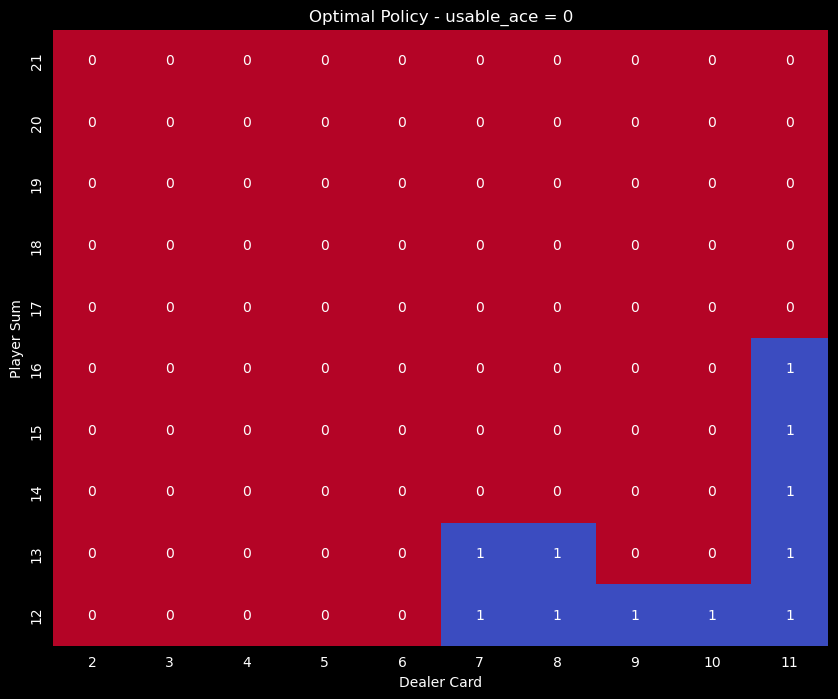

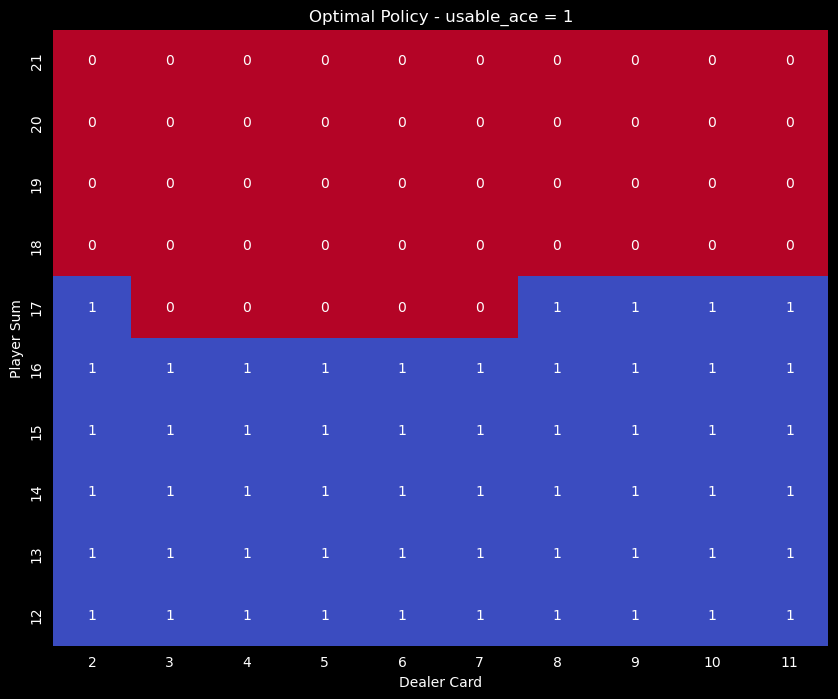

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_policy(usable_ace):
    # player_sum 12-21, dealer_sum 1-10
    policy_grid = np.zeros((10, 10))

    player_range = range(12, 22)
    dealer_range = range(2, 12)

    for i, player_sum in enumerate(player_range):
        for j, dealer_card in enumerate(dealer_range):
            state = (player_sum, dealer_card, usable_ace)

            best_action = get_best_action(state)

            policy_grid[i, j] = best_action

    plt.figure(figsize=(10, 8))
    title = "usable_ace = 1" if usable_ace else "usable_ace = 0"


    sns.heatmap(policy_grid, annot=True, fmt=".0f",
                xticklabels=dealer_range, yticklabels=player_range,
                cmap="coolwarm_r", cbar=False)

    plt.title(f"Optimal Policy - {title}")
    plt.xlabel("Dealer Card")
    plt.ylabel("Player Sum")
    plt.gca().invert_yaxis()
    plt.show()

plot_policy(usable_ace=False)
plot_policy(usable_ace=True)